<center>

# **Árboles de Decisión**

---
## *Aprendizaje Supervisado*
### Dataset Iris

---

Introducción a la Inteligencia Artificial 2024-1

</center>

In [98]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, f_classif

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Carga y Exploración de Datos

In [99]:
# Cargar dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

print("Dimensiones del dataset:", X.shape)
print("\nPrimeras filas:")
print(X.head())
print("\nDistribución de clases:")
print(y.value_counts())

Dimensiones del dataset: (150, 4)

Primeras filas:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Distribución de clases:
0    50
1    50
2    50
Name: count, dtype: int64


### Visualización de la Distribución de Clases

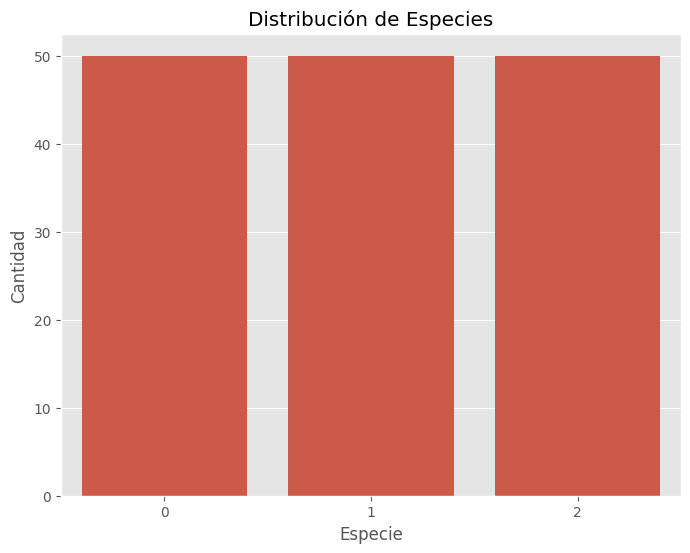

In [100]:
plt.figure(figsize=(8, 6))
sb.countplot(x=y)
plt.title('Distribución de Especies')
plt.xlabel('Especie')
plt.ylabel('Cantidad')
plt.show()

## 2. Selección de Características

In [101]:
# SelectKBest
selector = SelectKBest(f_classif, k='all')
selector.fit(X, y)

# Obtener scores
scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
})
scores = scores.sort_values('Score', ascending=False)

print("Importancia de características:")
print(scores)

Importancia de características:
             Feature        Score
2  petal length (cm)  1180.161182
3   petal width (cm)   960.007147
0  sepal length (cm)   119.264502
1   sepal width (cm)    49.160040


## 3. Comparativa entre Gini y Entropía

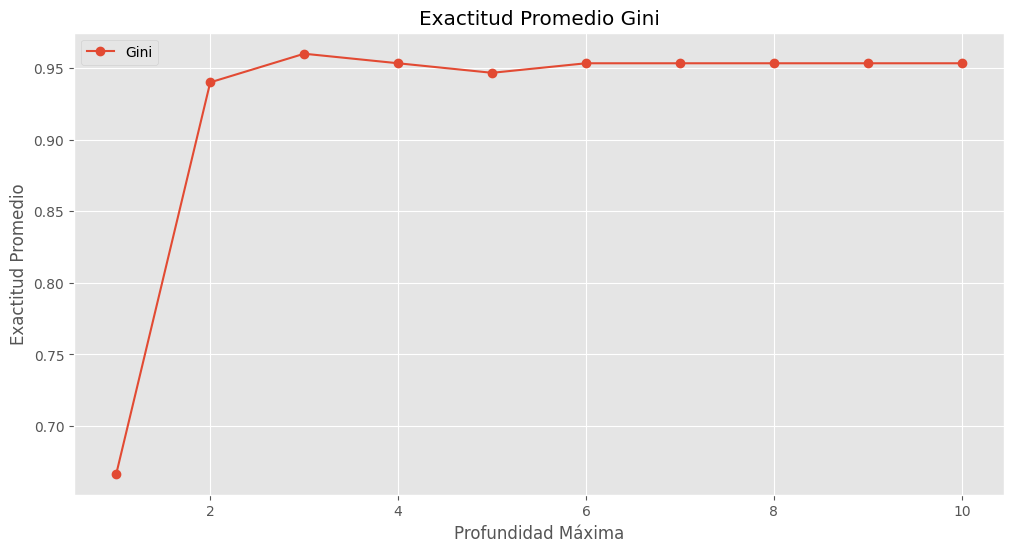

Gini:
Profundidad: 1, Exactitud Promedio: 0.6667
Profundidad: 2, Exactitud Promedio: 0.9400
Profundidad: 3, Exactitud Promedio: 0.9600
Profundidad: 4, Exactitud Promedio: 0.9533
Profundidad: 5, Exactitud Promedio: 0.9467
Profundidad: 6, Exactitud Promedio: 0.9533
Profundidad: 7, Exactitud Promedio: 0.9533
Profundidad: 8, Exactitud Promedio: 0.9533
Profundidad: 9, Exactitud Promedio: 0.9533
Profundidad: 10, Exactitud Promedio: 0.9533


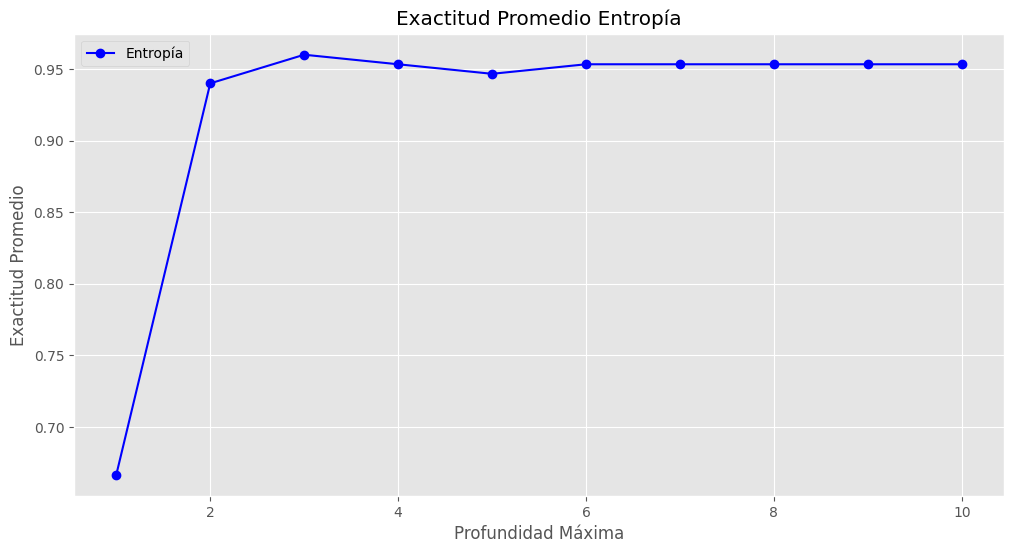

Entropía:
Profundidad: 1, Exactitud Promedio: 0.6667
Profundidad: 2, Exactitud Promedio: 0.9400
Profundidad: 3, Exactitud Promedio: 0.9600
Profundidad: 4, Exactitud Promedio: 0.9533
Profundidad: 5, Exactitud Promedio: 0.9467
Profundidad: 6, Exactitud Promedio: 0.9533
Profundidad: 7, Exactitud Promedio: 0.9533
Profundidad: 8, Exactitud Promedio: 0.9533
Profundidad: 9, Exactitud Promedio: 0.9533
Profundidad: 10, Exactitud Promedio: 0.9533

Mejor criterio: gini
Mejor profundidad: 3
Mejor exactitud: 0.9600


In [102]:
# Gini vs Entropy
criteria = ['gini', 'entropy']
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
max_depths = range(1, 11)

results = {'gini': [], 'entropy': []}

for criterion in criteria:
    for depth in max_depths:
        scores = []
        for train_idx, val_idx in cv.split(X, y):
            X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
            y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
            
            clf = DecisionTreeClassifier(
                criterion=criterion,
                max_depth=depth,
                random_state=42
            )
            clf.fit(X_train_cv, y_train_cv)
            score = clf.score(X_val_cv, y_val_cv)
            scores.append(score)
        
        results[criterion].append(np.mean(scores))

# Visualización Gini
plt.figure(figsize=(12, 6))
plt.plot(max_depths, results['gini'], marker='o', label='Gini')
plt.xlabel('Profundidad Máxima')
plt.ylabel('Exactitud Promedio')
plt.title('Exactitud Promedio Gini')
plt.legend()
plt.grid(True)
plt.show()

# Resultados Gini
print("Gini:")
for depth, score in zip(max_depths, results['gini']):
    print(f"Profundidad: {depth}, Exactitud Promedio: {score:.4f}")

# Visualización Entropía
plt.figure(figsize=(12, 6))
plt.plot(max_depths, results['entropy'], marker='o', label='Entropía', color='blue')
plt.xlabel('Profundidad Máxima')
plt.ylabel('Exactitud Promedio')
plt.title('Exactitud Promedio Entropía')
plt.legend()
plt.grid(True)
plt.show()

# Resultados Entropía
print("Entropía:")
for depth, score in zip(max_depths, results['entropy']):
    print(f"Profundidad: {depth}, Exactitud Promedio: {score:.4f}")

# Determinar el mejor criterio y profundidad
best_criterion = max(results.items(), key=lambda x: max(x[1]))[0]
best_depth = max_depths[np.argmax(results[best_criterion])]

print(f"\nMejor criterio: {best_criterion}")
print(f"Mejor profundidad: {best_depth}")
print(f"Mejor exactitud: {max(results[best_criterion]):.4f}")

## 4. Entrenamiento del Modelo Final

In [103]:
# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Creación y entrenamiento del modelo con los mejores parámetros
clf = DecisionTreeClassifier(
    criterion=best_criterion,
    max_depth=best_depth,
    random_state=42,
    class_weight='balanced'  # Balanceo automático de clases
)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

## 5. Visualización del Árbol

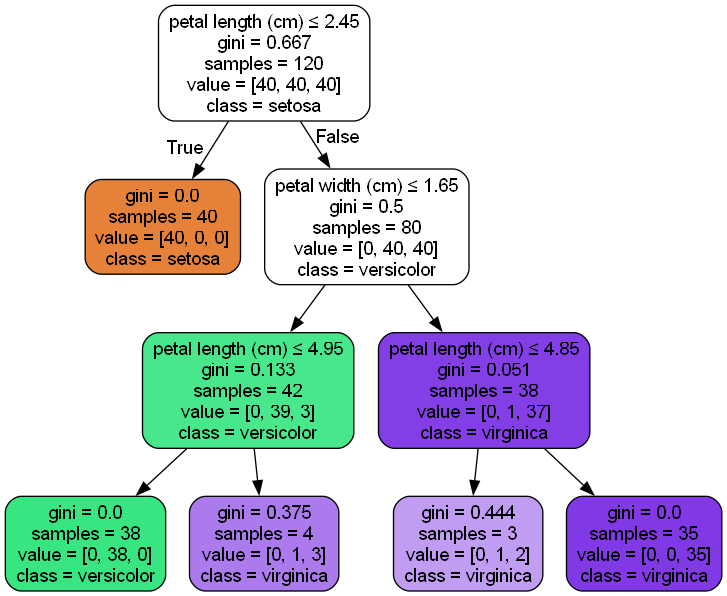

In [104]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import check_call

export_graphviz(
    clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=3  # limitar profundidad para mejor visualización
)

check_call(['dot', '-Tpng', 'iris_tree.dot', '-o', 'iris_tree.png'])

Image('iris_tree.png')

## 6. Matriz de Confusión

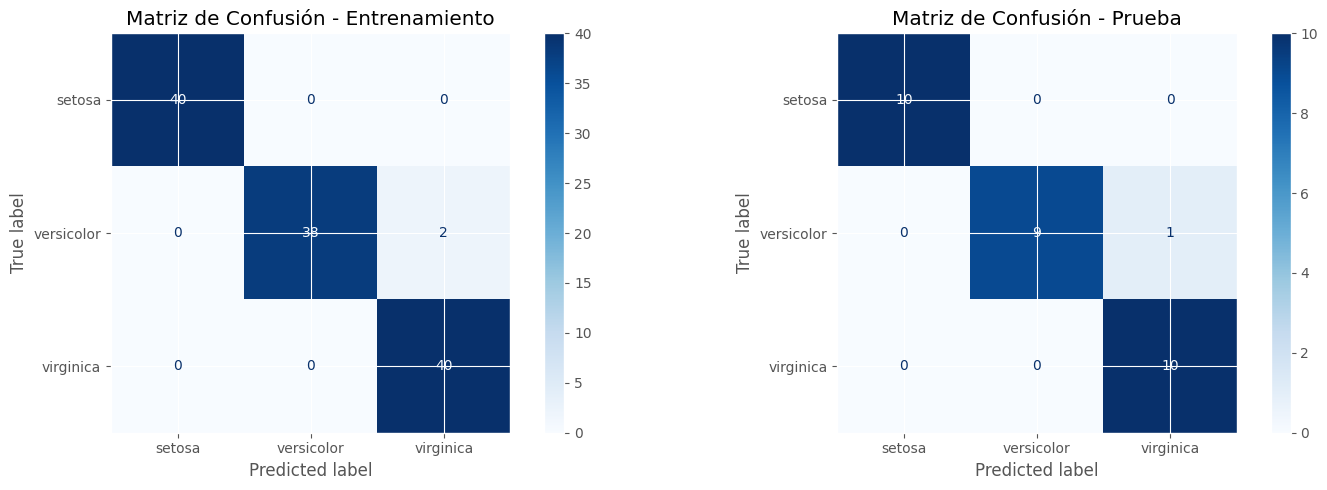

In [105]:
# Crear subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Matriz de confusión - Entrenamiento
ConfusionMatrixDisplay.from_estimator(
    clf, X_train, y_train,
    display_labels=iris.target_names,
    cmap=plt.cm.Blues,
    ax=ax1
)
ax1.set_title('Matriz de Confusión - Entrenamiento')

# Matriz de confusión - Prueba
ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test,
    display_labels=iris.target_names,
    cmap=plt.cm.Blues,
    ax=ax2
)
ax2.set_title('Matriz de Confusión - Prueba')

plt.tight_layout()
plt.show()

## 7. Evaluación del Modelo

In [106]:
# Predicciones
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Métricas de rendimiento
print("Exactitud en entrenamiento: {:.2f}".format(accuracy_score(y_train, y_pred_train)))
print("Exactitud en prueba: {:.2f}".format(accuracy_score(y_test, y_pred_test)))

print("\nReporte de clasificación en conjunto de prueba:")
print(classification_report(y_test, y_pred_test, target_names=iris.target_names))

Exactitud en entrenamiento: 0.98
Exactitud en prueba: 0.97

Reporte de clasificación en conjunto de prueba:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## 8. Importancia de Características

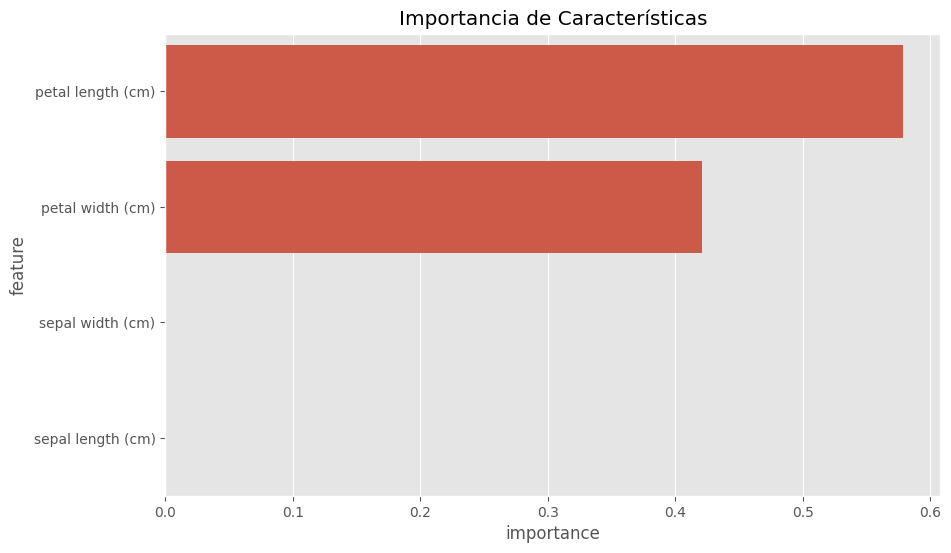

In [107]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sb.barplot(x='importance', y='feature', data=importances)
plt.title('Importancia de Características')
plt.show()

## 9. Predicción con Nuevos Datos

In [108]:
# Ejemplo de predicción con nuevos datos
nuevo_ejemplo = pd.DataFrame([
    [5.1, 3.5, 1.4, 0.2],  # Ejemplo Setosa
    [7.0, 3.2, 4.7, 1.4],  # Ejemplo Versicolor
    [6.3, 3.3, 6.0, 2.5]   # Ejemplo Virginica
], columns=X.columns)

predicciones = clf.predict(nuevo_ejemplo)
probabilidades = clf.predict_proba(nuevo_ejemplo)

print("Predicciones:")
for i, (pred, prob) in enumerate(zip(predicciones, probabilidades)):
    print(f"Ejemplo {i+1}:")
    print(f"  Clase predicha: {iris.target_names[pred]}")
    print(f"  Probabilidades: {dict(zip(iris.target_names, prob))}\n")

Predicciones:
Ejemplo 1:
  Clase predicha: setosa
  Probabilidades: {np.str_('setosa'): np.float64(1.0), np.str_('versicolor'): np.float64(0.0), np.str_('virginica'): np.float64(0.0)}

Ejemplo 2:
  Clase predicha: versicolor
  Probabilidades: {np.str_('setosa'): np.float64(0.0), np.str_('versicolor'): np.float64(1.0), np.str_('virginica'): np.float64(0.0)}

Ejemplo 3:
  Clase predicha: virginica
  Probabilidades: {np.str_('setosa'): np.float64(0.0), np.str_('versicolor'): np.float64(0.0), np.str_('virginica'): np.float64(1.0)}

